In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset

dataset = load_dataset("imagefolder", data_dir='/data')

Resolving data files:   0%|          | 0/800 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/200 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'caption_1', 'caption_2', 'caption_3', 'caption_4', 'caption_5'],
        num_rows: 800
    })
    test: Dataset({
        features: ['image', 'caption_1', 'caption_2', 'caption_3', 'caption_4', 'caption_5'],
        num_rows: 200
    })
})

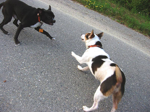

In [ ]:
example = dataset['train'][0]
image = example["image"]
width, height = image.size
display(image.resize((int(0.3*width), int(0.3*height))))

In [ ]:
example["caption_1"]

'black dog and spotted dog are fighting'

In [ ]:
from torch.utils.data import Dataset

class ImageCaptioningDataset(Dataset):
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]

        encoding = self.processor(images=item["image"], text=item["caption_1"], padding="max_length", return_tensors="pt")

        # remove batch dimension
        encoding = {k:v.squeeze() for k,v in encoding.items()}

        return encoding

In [ ]:
from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained("microsoft/git-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
train_dataset = ImageCaptioningDataset(dataset['train'], processor)
test_dataset = ImageCaptioningDataset(dataset['test'], processor)

In [ ]:
import torch

item = train_dataset[0]
for k,v in item.items():
  print(k,v.shape)

Legacy behavior is being used. The current behavior will be deprecated in version 5.0.0. In the new behavior, if both images and text are provided, the last token (EOS token) of the input_ids and attention_mask tensors will be removed. To test the new behavior, set `legacy=False`as a processor call argument.


input_ids torch.Size([512])
attention_mask torch.Size([512])
pixel_values torch.Size([3, 224, 224])


In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=8)
test_dataloader = DataLoader(test_dataset, shuffle=True, batch_size=8)

In [ ]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  print(k,v.shape)

input_ids torch.Size([8, 512])
attention_mask torch.Size([8, 512])
pixel_values torch.Size([8, 3, 224, 224])


In [ ]:
processor.decode(batch["input_ids"][0])

'[CLS] black dog is following brown dog that is carrying brown plate through grassy field [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD

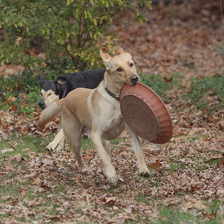

In [ ]:
from PIL import Image
import numpy as np

MEAN = np.array([123.675, 116.280, 103.530]) / 255
STD = np.array([58.395, 57.120, 57.375]) / 255

unnormalized_image = (batch["pixel_values"][0].numpy() * np.array(STD)[:, None, None]) + np.array(MEAN)[:, None, None]
unnormalized_image = (unnormalized_image * 255).astype(np.uint8)
unnormalized_image = np.moveaxis(unnormalized_image, 0, -1)
Image.fromarray(unnormalized_image)

In [ ]:
from transformers import AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained("microsoft/git-base")

config.json:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/707M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.4 MB/s eta 0:00:00


In [ ]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 35.2 MB/s eta 0:00:00


In [ ]:
from evaluate import load

wer = load("wer")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predicted = logits.argmax(-1)
    decoded_labels = processor.batch_decode(labels, skip_special_tokens=True)
    decoded_predictions = processor.batch_decode(predicted, skip_special_tokens=True)
    wer_score = wer.compute(predictions=decoded_predictions, references=decoded_labels)
    return {"wer_score": wer_score}

In [ ]:
from transformers import get_scheduler

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

num_epochs = 2
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

In [ ]:
batch.keys()

dict_keys(['input_ids', 'attention_mask', 'pixel_values'])

In [ ]:
# dummy forward pass
outputs = model(input_ids=batch["input_ids"],
                attention_mask=batch["attention_mask"],
                pixel_values=batch["pixel_values"],
                labels=batch["input_ids"])
outputs.loss

tensor(12.1255, grad_fn=<NllLossBackward0>)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()

for epoch in range(num_epochs):
  print("Epoch:", epoch)
  for idx, batch in enumerate(train_dataloader):
    input_ids = batch.pop("input_ids").to(device)
    pixel_values = batch.pop("pixel_values").to(device)
    attention_mask = batch.pop("attention_mask").to(device)

    outputs = model(input_ids=input_ids,
                    pixel_values=pixel_values,
                    attention_mask=attention_mask,
                    labels=input_ids)

    loss = outputs.loss

    print("Loss:", loss.item())

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

Epoch: 0
Loss: 11.89283561706543
Loss: 10.483153343200684
Loss: 10.021842956542969
Loss: 9.76887035369873
Loss: 9.48377513885498
Loss: 9.264802932739258
Loss: 9.053961753845215
Loss: 8.840245246887207
Loss: 8.688702583312988
Loss: 8.531189918518066
Loss: 8.447871208190918
Loss: 8.316308975219727
Loss: 8.179118156433105
Loss: 8.069522857666016
Loss: 7.972745418548584
Loss: 7.868438720703125
Loss: 7.753498077392578
Loss: 7.6552886962890625
Loss: 7.556310653686523
Loss: 7.458520889282227
Loss: 7.365653991699219
Loss: 7.237407207489014
Loss: 7.141608238220215
Loss: 7.04477071762085
Loss: 6.943500518798828
Loss: 6.851624011993408
Loss: 6.7308454513549805
Loss: 6.6088056564331055
Loss: 6.496825218200684
Loss: 6.393229007720947
Loss: 6.288264751434326
Loss: 6.180815696716309
Loss: 6.069866180419922
Loss: 5.968654632568359
Loss: 5.856994152069092
Loss: 5.743707656860352
Loss: 5.626043319702148
Loss: 5.5062456130981445
Loss: 5.41008186340332
Loss: 5.301601409912109
Loss: 5.18583345413208
Loss: 

In [ ]:
!pip install tqdm

In [ ]:
from evaluate import load
from tqdm import tqdm

# Load WER metric
wer = load("wer")

model.eval()  # Set the model to evaluation mode

total_samples = 0
wer_score = 0.0

with torch.no_grad():  # Disable gradient calculation for evaluation
    for batch in tqdm(test_dataloader, desc="Evaluating"):
        # Move data to the device
        input_ids = batch.pop("input_ids").to(device)
        pixel_values = batch.pop("pixel_values").to(device)

        # Generate predictions
        outputs = model.generate(pixel_values=pixel_values)

        # Decode predictions and labels
        decoded_predictions = processor.batch_decode(outputs, skip_special_tokens=True)
        decoded_labels = processor.batch_decode(input_ids, skip_special_tokens=True)

        # Calculate WER for each batch
        for i in range(len(decoded_predictions)):
            pred = decoded_predictions[i]
            label = decoded_labels[i]

            total_samples += 1
            wer_score += wer.compute(predictions=[pred], references=[label])

# Calculate average WER
avg_wer = wer_score / total_samples
print(f"Average WER: {avg_wer:.4f}")

Evaluating: 100%|██████████| 25/25 [00:47<00:00,  1.90s/it]

Average WER: 0.9744


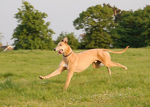

In [ ]:
# load image
example = dataset['test'][49]
image = example["image"]
width, height = image.size
display(image.resize((int(0.3*width), int(0.3*height))))

In [ ]:
# prepare image for the model
inputs = processor(images=image, return_tensors="pt").to(device)
pixel_values = inputs.pixel_values

generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

brown dog is jumping in the air
